In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing libraries
import os 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import requests as rt 
import tweepy
import json 

# Gathering Data

In [3]:
# Import main twitter archive dataset:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.shape

(2356, 17)

In [4]:
#making file path or check for it 
folder_name = 'image_predictions_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = rt.get(url)

In [5]:
#opening the file 
with open(os.path.join(folder_name,
                      url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [6]:
#reading file 
image_predictions = pd.read_csv('image-predictions.tsv' , sep = "\t")

In [7]:
#Gather_from_API

import tweepy

consumer_key = 'eM2uNdltFP0JcOU7rv0LPVkDV'
consumer_secret = 'j7JRTMkcqlGFmvC6htO3R7oJAsnzA9UfeCKIBlcUkQXEwy6ISb'
access_token = '2339269667-bPnBpfZGaRE8Z6KvYQpFOQPYAImiZF6lKd0NDGn'
access_secret = 'FIw364epMgPCyXfTlC5ryfPDR1dXZLVuREIEf0Bll6xqB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Fail
780: 775842724423557120
Fail
781: 775733305207554048
Fail
782: 775729183532220416
Fail
783: 775364825476165632
Fail
784: 775350846108426240
Fail
785: 775096608509886464
Fail
786: 775085132600442880
Fail
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160


Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Fail
1784: 677673981332312066
Fail
1785: 677662372920729601
Fail
1786: 677644091929329666
Fail
1787: 677573743309385728
Fail
1788: 677565715327688705
Fail
1789: 677557565589463040
Fail
1790: 677547928504967168
Fail
1791: 677530072887205888
Fail
1792: 677335745548390400
Fail
1793: 677334615166730240
Fail
1794: 677331501395156992
Fail
1795: 677328882937298944
Fail
1796: 677314812125323265
Fail
1797: 677301033169788928
Fail
1798: 677269281705472000
Fail
1799: 677228873407442944
Fail
1800: 677187300187611136
Fail
1801: 676975532580409345
Fail
1802: 676957860086095872
Fail
1803: 676949632774234114
Fail
1804: 676948236477857792
Fail
1805: 676946864479084545
Fail
1806: 676942428000112642
Fail
1807: 676936541936185344
Fail
1808: 676916996760600576
Fail
1809: 676897532954456065
Fail
1810: 676864501615042560
Fail
1811: 676821958043033607
Fail
1812: 676819651066732545
Fail
1813: 676811746707918848
Fail
1814: 676776431406465024
Fail
1815: 676617503762681856
Fail
1816: 676613908052996102
Fail
1817:

Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
20

Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
23

In [9]:
#opening json file 
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [10]:
#reading json file data
json_data = pd.DataFrame(df_list , columns = ['id' , 'retweet_count' , 'favorite_count'])

# Assessing Data

In [11]:
# Showing the first three rows of twitter_archive dataframe:
twitter_archive.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [15]:
type(twitter_archive.timestamp[0])

str

In [16]:
twitter_archive.duplicated().sum()

0

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
# Show out the first three rows of image_predictions dataframe:
image_predictions.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
type(image_predictions.jpg_url[0])

str

In [22]:
image_predictions.duplicated().sum()

0

In [23]:
# Show out the first three rows of json_data dataframe:
json_data.head(3)

id  retweet_count  favorite_count
0  892420643555336193           7007           33809
1  892177421306343426           5301           29327
2  891815181378084864           3480           22046

In [24]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2108 non-null   int64
 1   retweet_count   2108 non-null   int64
 2   favorite_count  2108 non-null   int64
dtypes: int64(3)
memory usage: 49.5 KB


In [25]:
json_data.duplicated().sum()

0

## Making copy of all datasets

In [26]:
# Creating a copy of each dataframe to be used in cleaning processes and keep original one as it is:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
json_data_clean = json_data.copy()

# Assessing and Cleaning Data

In [27]:
# Check records for non dogs from image_predictions_clean dataframe :
non_dogs = image_predictions[image_predictions['p1_dog']== False].index
non_dogs

Int64Index([   6,    8,   17,   18,   21,   22,   25,   29,   33,   43,
            ...
            1992, 2012, 2013, 2021, 2022, 2026, 2046, 2052, 2071, 2074],
           dtype='int64', length=543)

In [28]:
# Drop all records for non dogs from image_predictions_clean dataframe as we only interested in dogs rating :
image_predictions.drop(non_dogs, inplace = True)

Test

In [29]:
image_predictions[image_predictions['p1_dog'] == False]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [30]:
# Checking whether number of tweets in twitter_archive is equal to number of tweets that have images in image_predictions
twitter_archive_clean['tweet_id'].size == twitter_archive_clean.isin(image_predictions['tweet_id']).sum()['tweet_id']

False

- As shown that there are some tweets in twitter_archive that has no images in image_predictions
- I believe those without images tweets will not be useful in further analysis

In [31]:
# filtering twitter_archive to only have tweets having images in image_predictions dataframe
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(image_predictions['tweet_id'].unique())]
twitter_archive_clean.shape

(1532, 17)

In [32]:
# Ensuring that all tweets in twitter_archive have images in image_predictions

twitter_archive_clean['tweet_id'].size == twitter_archive_clean['tweet_id'].isin(image_predictions['tweet_id']).size

True

In [33]:
# Filtering twitter_archive to only have original tweets and remove all retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
4     2017-07-29 16:00:24 +0000   
5     2017-07-29 00:08:17 +0000   
6     2017-07-28 16:27:12 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
5     Here we have a majestic great white breaching ...                  NaN   
6     Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1                          NaN                        NaN   
2                          NaN                        NaN   
4                          NaN                        NaN   
5                          NaN                        NaN   
6                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
4     https://twitter.com/dog_rates/status/891327558...                12   
5     https://twitt

In [34]:
# Test that all tweets in twitter_archive never have retweet_id; means they are original tweets
twitter_archive_clean['retweeted_status_id'].unique()

array([nan])

- It is noted that retweet_id include only unique value "nan"

In [35]:
# Removing unnecessary columns that will not be used in further analysis such as in-reply-to-status-id , retweet_id etc.
drop_list = ['in_reply_to_status_id' , 'in_reply_to_user_id' , 'source' , 'retweeted_status_id',
             'retweeted_status_user_id','retweeted_status_timestamp' ,'expanded_urls','name' ]

twitter_archive_clean.drop(drop_list , inplace =True , axis=1)

In [36]:
# Ensuring that all unnecessary columns have been removed
twitter_archive_clean.shape

(1477, 9)


- It is Noted that num. of columns became 10 instead of 17 (7 unnecessary columns have been removed)

In [37]:
# Showing out twitter archive data frame after dropping unnecessary columns:
twitter_archive_clean.head()

tweet_id                  timestamp  \
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   
5  891087950875897856  2017-07-29 00:08:17 +0000   
6  890971913173991426  2017-07-28 16:27:12 +0000   

                                                text  rating_numerator  \
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
4  This is Franklin. He would like you to stop ca...                12   
5  Here we have a majestic great white breaching ...                13   
6  Meet Jax. He enjoys ice cream so much he gets ...                13   

   rating_denominator doggo floofer pupper puppo  
1                  10  None    None   None  None  
2                  10  None    None   None  None  
4                  10  None    None   None  None  
5                  10  None    None   None  None  
6                  10  None    None   None  None

In [38]:
# Checking unique values for stage columns
twitter_archive['doggo'].unique()

array(['None', 'doggo'], dtype=object)

- As shown "None" in case it is not belong to this stage and "doggo" in case it belongs to this doggo stage

In [39]:
# Repace "None" values in dog stage ['doggo', 'floofer', 'pupper', 'puppo']  columns by blank text''
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]= twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None' , '')

In [40]:
# checking for unique values for dog stage columns 'doggo', 'floofer', 'pupper', 'puppo'
twitter_archive_clean['doggo'].unique()

array(['', 'doggo'], dtype=object)

- It was Noted that "None" has been replaced with an blank text ' '

In [41]:
# Dog stage columns ['doggo', 'floofer', 'pupper', 'puppo'] in twitter_archive clean should be merged in One column called 'Stage'
twitter_archive_clean['stage'] = twitter_archive_clean['doggo'] +twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [42]:
# Test that stage column has been created and check unique values within it : 
twitter_archive_clean['stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [43]:
# Replacing blank text value in stage column by np.nan:
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

In [44]:
# Test that there is no blank text in stage column and all have been replaced by np.nan:
twitter_archive_clean[twitter_archive_clean['stage']== '']

Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, doggo, floofer, pupper, puppo, stage]
Index: []

- It is noted that there are no records with blank text

In [45]:
# Drop ['doggo', 'puppo', 'pupper', 'floofer'] columns as they are not useful in further analysis:
to_drop_list = ['doggo', 'puppo', 'pupper', 'floofer']
twitter_archive_clean.drop(to_drop_list , axis=1 , inplace= True)

In [46]:
# Ensuring that ['doggo', 'puppo', 'pupper', 'floofer'] columns have been removed:
twitter_archive_clean.head(3)

tweet_id                  timestamp  \
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  rating_numerator  \
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator stage  
1                  10   NaN  
2                  10   NaN  
4                  10   NaN

In [47]:
# The summary for twitter_archive_clean:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1477 non-null   int64 
 1   timestamp           1477 non-null   object
 2   text                1477 non-null   object
 3   rating_numerator    1477 non-null   int64 
 4   rating_denominator  1477 non-null   int64 
 5   stage               228 non-null    object
dtypes: int64(3), object(3)
memory usage: 80.8+ KB


In [48]:
# Statistical summary for rating_ denominator:
twitter_archive_clean['rating_denominator'].describe()

count    1477.000000
mean       10.534868
std         6.849696
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       150.000000
Name: rating_denominator, dtype: float64

In [49]:
# Show out records where rating_denominator != 10: 
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['text','rating_numerator', 'rating_denominator' ]]

text  rating_numerator  \
433   The floofs have been released I repeat the flo...                84   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                24   
902   Why does this never happen at my front door......               165   
1068  After so many requests, this is Bretagne. She ...                 9   
1165  Happy 4/20 from the squad! 13/10 for all https...                 4   
1202  This is Bluebert. He just saw that both #Final...                50   
1228  Happy Saturday here's 9 puppers on a bench. 99...                99   
1254  Here's a brigade of puppers. All look very pre...                80   
1274  From left to right:\nCletus, Jerome, Alejandro...                45   
1351  Here is a whole flock of puppers.  60/50 I'll ...                60   
1433  Happy Wednesday here's a bucket of pups. 44/40...                44   
1634  Two sneaky puppers were not initially seen, mo...               143   
1635  Someone help the girl is being mugged. Several...               121   
1843  Here we have an entire platoon of puppers. Tot...                88   
2335  This is an Albanian 3 1/2 legged  Episcopalian...                 1   

      rating_denominator  
433                   70  
516                    7  
902                  150  
1068                  11  
1165                  20  
1202                  50  
1228                  90  
1254                  80  
1274                  50  
1351                  50  
1433                  40  
1634                 130  
1635                 110  
1843                  80  
2335                   2

- It was noted that most of them are a group of dogs not one dog except record (2335)
- It was noted that tweet 516 has no rating in original text

In [50]:
# fixing record (2335) firstly:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].loc[2335,'text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

- Show out text for record (2335) , it seems that this tweet fro a dog bur rate is inaccurate
- So, we fix this denominator value

In [51]:
# Fixing the denominator and numerator values for recore (2335)
twitter_archive_clean.loc[2335 , 'rating_denominator'] = 10
twitter_archive_clean.loc[2335 , 'rating_numerator'] = 9

In [52]:
# Ensuring that record(2335) has been fixed:
twitter_archive_clean.loc[2335,:]

tweet_id                                             666287406224695296
timestamp                                     2015-11-16 16:11:11 +0000
text                  This is an Albanian 3 1/2 legged  Episcopalian...
rating_numerator                                                      9
rating_denominator                                                   10
stage                                                               NaN
Name: 2335, dtype: object

In [53]:
# Identify all tweets that have "rating_denominator" != 10 
wrong_denominator = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].index
wrong_denominator

Int64Index([433, 516, 902, 1068, 1165, 1202, 1228, 1254, 1274, 1351, 1433,
            1634, 1635, 1843],
           dtype='int64')

- It is noted that there are some denominators greater than 10

In [54]:
# Drop all tweets that have "rating_denominator" != 10 
twitter_archive_clean.drop(wrong_denominator , inplace = True )

In [55]:
# Ensuring that all tweets that have rating_denominator != 10 have been removed:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, stage]
Index: []

- It is noted that there is no records where rating_denominator != 10

In [56]:
# Check "rating_numerator"  statistical summary
twitter_archive_clean['rating_numerator'].describe()

count    1463.000000
mean       10.987013
std         2.451549
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: rating_numerator, dtype: float64

In [57]:
# Showing tweets with rating_numerator more than 15:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15]

tweet_id                  timestamp  \
695   786709082849828864  2016-10-13 23:23:56 +0000   
763   778027034220126208  2016-09-20 00:24:34 +0000   
1712  680494726643068929  2015-12-25 21:06:00 +0000   

                                                   text  rating_numerator  \
695   This is Logan, the Chow who lived. He solemnly...                75   
763   This is Sophie. She's a Jubilant Bush Pupper. ...                27   
1712  Here we have uncovered an entire battalion of ...                26   

      rating_denominator   stage  
695                   10     NaN  
763                   10  pupper  
1712                  10     NaN

In [58]:
# Showing the text for tweets that have rating_numerator 75 (index - 695):
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].loc[695,'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

- It is noted from the text that the numerator is 9.75 and not 75

In [59]:
# fixing rating numerator for previous tweet (index 695):
twitter_archive_clean.loc[695 , 'rating_numerator'] = 9.75

In [60]:
# Showing the text for tweets that have rating_numerator 27 (index - 763):
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].loc[ 763,'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

- It is noted that the numerator is 11.27 and not 27

In [61]:
# fixing rating numerator for previous tweet (index 763):
twitter_archive_clean.loc[763 , 'rating_numerator'] = 11.27

In [62]:
# Showing the text for tweets that have rating_numerator 26 (index - 1712):
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].loc[1712,'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

- It is noted that the numerator is 11.26 and not 26

In [63]:
# fixing rating numerator for previous tweet (index 1712):
twitter_archive_clean.loc[1712 , 'rating_numerator'] = 11.26

In [64]:
# Ensuring that tweets having rating_numerator more than 15 has been fixed:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15]

Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, stage]
Index: []

- It is noted that there is no tweets having rating_numerator more than 15 any more.

In [65]:
# Checking the statistical summary for rating_numerator again
twitter_archive_clean['rating_numerator'].describe()

count    1463.000000
mean       10.921586
std         1.695473
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [66]:
# Droping rating_denominator column as it will not be useful in any future analysis:
twitter_archive_clean.drop('rating_denominator' , axis= 1, inplace= True)

In [91]:
# converting timestamp to "date time"
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])

In [92]:
# Ensuring that rating_denominator column has been removed:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 1 to 2355
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1463 non-null   int64              
 1   timestamp         1463 non-null   datetime64[ns, UTC]
 2   text              1463 non-null   object             
 3   rating_numerator  1463 non-null   float64            
 4   stage             228 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 100.9+ KB


In [68]:
#show up summary for json_data dataframe:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2108 non-null   int64
 1   retweet_count   2108 non-null   int64
 2   favorite_count  2108 non-null   int64
dtypes: int64(3)
memory usage: 49.5 KB


In [69]:
# Fix name for "id" column in json_data_clean to "tweet_id" to be consistent with other two data frames while merging
json_data_clean.rename(columns={'id': 'tweet_id'} , inplace = True)

In [70]:
# Check that name of "id" column in json_df has been changed to "tweet_id":
json_data_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [71]:
# show up columns' names of image_predictions_clean data frame:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [72]:
image_predictions[image_predictions['img_num']==2]

tweet_id                                          jpg_url  \
319   671768281401958400  https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg   
345   672272411274932228  https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg   
381   673317986296586240  https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg   
410   673887867907739649  https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg   
441   674468880899788800  https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg   
...                  ...                                              ...   
2048  886983233522544640  https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2051  887473957103951883  https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2055  888202515573088257  https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2067  890729181411237888  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

      img_num                  p1   p1_conf  p1_dog                   p2  \
319         2           Chihuahua  0.500373    True       French_bulldog   
345         2                 pug  0.914685    True   Norwegian_elkhound   
381         2  miniature_pinscher  0.384099    True           bloodhound   
410         2   Brabancon_griffon  0.216767    True            Chihuahua   
441         2                chow  0.526230    True           Pomeranian   
...       ...                 ...       ...     ...                  ...   
2048        2           Chihuahua  0.793469    True          toy_terrier   
2051        2            Pembroke  0.809197    True  Rhodesian_ridgeback   
2055        2            Pembroke  0.809197    True  Rhodesian_ridgeback   
2067        2          Pomeranian  0.566142    True           Eskimo_dog   
2070        2              basset  0.555712    True     English_springer   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
319   0.112796    True            Italian_greyhound  0.062893    True  
345   0.014982    True                  Siamese_cat  0.009221   False  
381   0.079923    True                   Rottweiler  0.068594    True  
410   0.190958    True             golden_retriever  0.163288    True  
441   0.283647    True                   toy_poodle  0.067665    True  
...        ...     ...                          ...       ...     ...  
2048  0.143528    True                   can_opener  0.032253   False  
2051  0.054950    True                       beagle  0.038915    True  
2055  0.054950    True                       beagle  0.038915    True  
2067  0.178406    True                     Pembroke  0.076507    True  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  

[153 rows x 12 columns]

In [73]:
# Remove unnecessary columns [jpg_url, 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']:
to_drop_cols = ['jpg_url','img_num', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_predictions_clean.drop(to_drop_cols , axis=1 , inplace =True)

In [74]:
# Test that all unnecessary columns has been removed from image_predictions_clean data frame:
image_predictions_clean.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

In [75]:
# Rename columns of image_predictions_clean data frame to be more descriptive:
new_names = {'p1': 'breed' , 'p1_conf': 'pred_confidence' , 'p1_dog': 'is_dog' }
image_predictions_clean.rename(columns= new_names , inplace =True)

In [76]:
# Check that column names for img_pred_clean have been changed:
image_predictions_clean.columns

Index(['tweet_id', 'breed', 'pred_confidence', 'is_dog'], dtype='object')

In [77]:
# Merge twitter_archive_clean with image_predictions_clean
df = twitter_archive_clean.merge(image_predictions_clean ,on='tweet_id' ,  how= 'inner')

# Merge df with json_data_clea to create master df that will be used in our analysis:
df_master = df.merge(json_data_clean , on= 'tweet_id' , how='inner')

In [78]:
# Test df_master by showing out samples:
df_master.sample(5)

tweet_id                  timestamp  \
695   720059472081784833  2016-04-13 01:22:10 +0000   
935   689623661272240129  2016-01-20 01:41:08 +0000   
776   707610948723478529  2016-03-09 16:56:11 +0000   
1122  671486386088865792  2015-12-01 00:30:04 +0000   
186   835172783151792128  2017-02-24 17:01:22 +0000   

                                                   text  rating_numerator  \
695   This is Charleson. He lost his plunger. Looked...               9.0   
935   This is Lucy. She's terrified of the stuffed b...              10.0   
776   This is Harper. She scraped her elbow attempti...              12.0   
1122  This is Malcolm. He just saw a spider. 10/10 h...              10.0   
186   We only rate dogs. Please don't send in any no...              12.0   

       stage             breed  pred_confidence  is_dog  retweet_count  \
695      NaN  Mexican_hairless         0.451852    True           1021   
935   pupper        toy_poodle         0.279604    True            581   
776      NaN  golden_retriever         0.383223    True           5741   
1122     NaN   German_shepherd         0.827035    True            173   
186      NaN     Border_collie         0.663138    True           5304   

      favorite_count  
695             3565  
935             2045  
776            15640  
1122             512  
186            24602

# Sorting Data

In [79]:
# Save our cleaned master data frame as CSV. file: 
df_master.to_csv('twitter_archive_master.csv' , index= False)

In [80]:
# show up a sample of cleaned master data set: 
df_master.head()

tweet_id                  timestamp  \
0  892177421306343426  2017-08-01 00:17:27 +0000   
1  891815181378084864  2017-07-31 00:18:03 +0000   
2  891327558926688256  2017-07-29 16:00:24 +0000   
3  891087950875897856  2017-07-29 00:08:17 +0000   
4  890971913173991426  2017-07-28 16:27:12 +0000   

                                                text  rating_numerator stage  \
0  This is Tilly. She's just checking pup on you....              13.0   NaN   
1  This is Archie. He is a rare Norwegian Pouncin...              12.0   NaN   
2  This is Franklin. He would like you to stop ca...              12.0   NaN   
3  Here we have a majestic great white breaching ...              13.0   NaN   
4  Meet Jax. He enjoys ice cream so much he gets ...              13.0   NaN   

                      breed  pred_confidence  is_dog  retweet_count  \
0                 Chihuahua         0.323581    True           5301   
1                 Chihuahua         0.716012    True           3480   
2                    basset         0.555712    True           7760   
3  Chesapeake_Bay_retriever         0.425595    True           2600   
4               Appenzeller         0.341703    True           1663   

   favorite_count  
0           29327  
1           22046  
2           35309  
3           17810  
4           10364

In [81]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1315
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1316 non-null   int64  
 1   timestamp         1316 non-null   object 
 2   text              1316 non-null   object 
 3   rating_numerator  1316 non-null   float64
 4   stage             203 non-null    object 
 5   breed             1316 non-null   object 
 6   pred_confidence   1316 non-null   float64
 7   is_dog            1316 non-null   bool   
 8   retweet_count     1316 non-null   int64  
 9   favorite_count    1316 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 104.1+ KB


In [82]:
df_master['breed'].value_counts()[0:10]

golden_retriever      128
Pembroke               80
Labrador_retriever     79
Chihuahua              68
pug                    49
Samoyed                37
chow                   35
toy_poodle             34
Pomeranian             33
cocker_spaniel         26
Name: breed, dtype: int64

## Which breed is most common in this twitter archive?

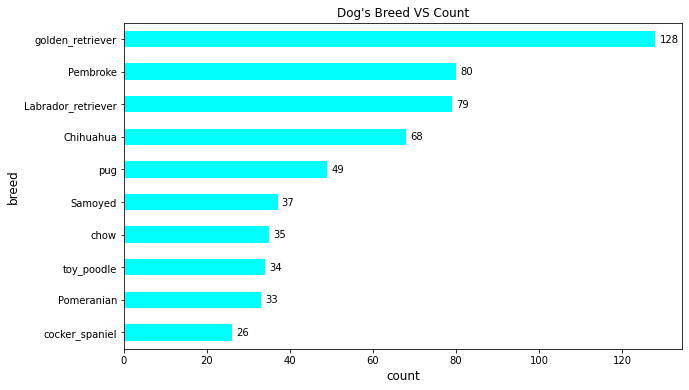

In [83]:
# Plot most common 10 breeds:
plt.figure(figsize=(10,6))
df_master['breed'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='cyan')

# Set x_label, y_label and title:
plt.xlabel('count',size=12)
plt.ylabel('breed', size=12)
plt.title('Dog\'s Breed VS Count' , size=12)

# Set x & y positions to add text over each bar:
x = df_master['breed'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Add text (showing value) over each bar:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')

 - Golden_Retriever is the most common breed in this twitter archive (There's 128 tweet for golden_retriever) 

## What is the relationship between Breed and rating?

In [84]:
# Let's check dogs having rating less than 8 :
less_8 = df_master[df_master['rating_numerator'] < 8]['breed'].value_counts()
less_8

Chihuahua                      5
pug                            4
Pembroke                       4
redbone                        2
borzoi                         2
Airedale                       2
soft-coated_wheaten_terrier    2
Saint_Bernard                  1
Border_collie                  1
miniature_schnauzer            1
black-and-tan_coonhound        1
miniature_pinscher             1
Norwich_terrier                1
Labrador_retriever             1
Pekinese                       1
malinois                       1
Tibetan_terrier                1
golden_retriever               1
Newfoundland                   1
Bedlington_terrier             1
Lakeland_terrier               1
Rottweiler                     1
bloodhound                     1
Boston_bull                    1
Brittany_spaniel               1
Samoyed                        1
Walker_hound                   1
dalmatian                      1
Shetland_sheepdog              1
Afghan_hound                   1
Rhodesian_

- Low rate is not associated with particular breed; There are diffrent breeds (few number of dogs in these breeds) got rate less than 8.

In [85]:
top_10_rating = df_master.groupby('breed')['rating_numerator'].mean().sort_values(ascending= False)[0:10]
top_10_rating

breed
Greater_Swiss_Mountain_dog    12.500000
Saluki                        12.500000
briard                        12.333333
Tibetan_mastiff               12.250000
Border_terrier                12.142857
silky_terrier                 12.000000
Eskimo_dog                    12.000000
Irish_water_spaniel           12.000000
Samoyed                       11.810811
Irish_setter                  11.750000
Name: rating_numerator, dtype: float64

## Which breed got the highest rating average?

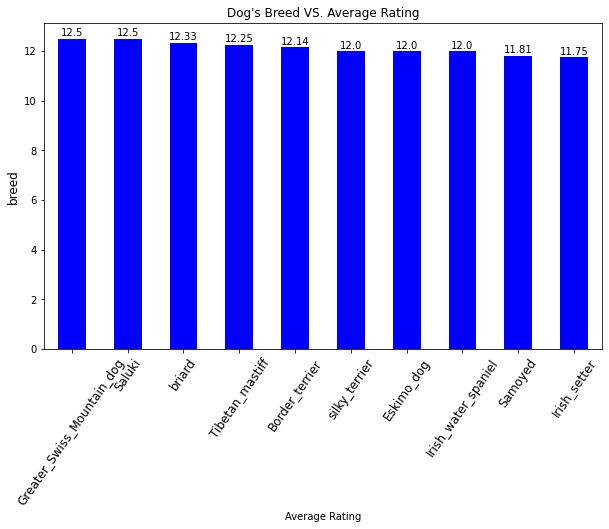

In [86]:
plt.figure(figsize=(10,6))
top_10_rating.plot(kind='bar' , color='blue')
plt.xticks(rotation= 55 , size= 12)
plt.xlabel('Average Rating' , size=10)
plt.ylabel('breed' , size= 12)
plt.title('Dog\'s Breed VS. Average Rating');

y= df_master.groupby('breed')['rating_numerator'].mean().sort_values(ascending= False).round(2)
x= np.arange(0,10,1)

for xx,yy in zip(x,y):
    plt.text(xx, yy+.1 , yy , ha='center')

- black and tan coonhound got the highest rating average (14.0)

In [87]:
# Show out top 10 breeds having highest average numbers of retweets and favorites in twitter archive:
top_retweets = df_master.groupby('breed')['retweet_count'].mean()[0:10].sort_values(ascending=False)
top_favorites = df_master.groupby('breed')['favorite_count'].mean()[0:10].sort_values(ascending=False)

## Which Breed Got the highest average number of retweets & favorites?

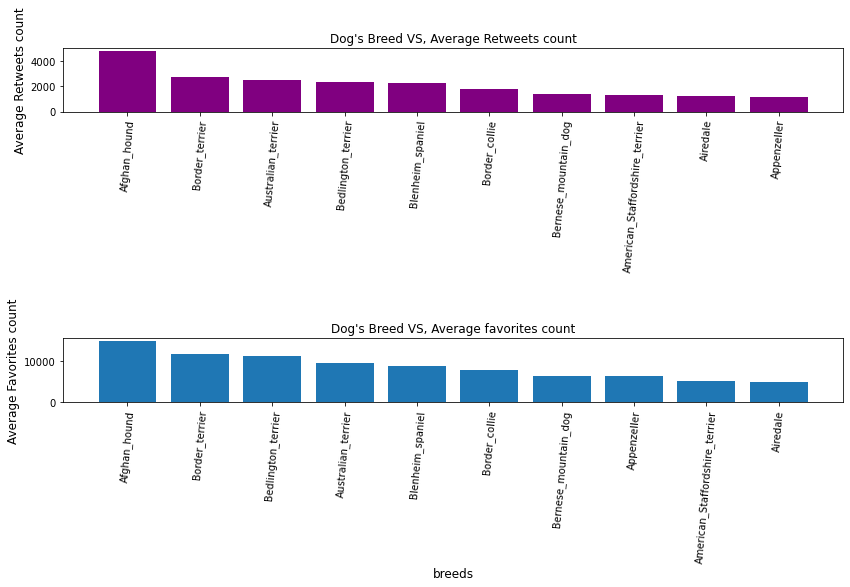

In [88]:
figure= plt.figure(figsize=(13,9))

plt.subplot(2,1,1 )
plt.bar(top_retweets.index, top_retweets.values , color='purple')
plt.ylabel('Average Retweets count' , size= 12)
plt.title('Dog\'s Breed VS, Average Retweets count')
plt.xticks(rotation =85)


plt.subplot(2,1,2)
plt.bar(top_favorites.index , top_favorites.values)
plt.ylabel('Average Favorites count' , size= 12)
plt.xlabel('breeds' , size= 12)
plt.title('Dog\'s Breed VS, Average favorites count')
plt.xticks(rotation = 85)

figure.tight_layout(pad=5)

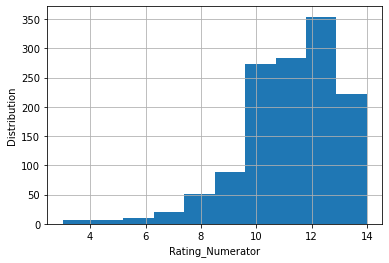

In [89]:
# Plot a histogram to show up distrbution of rating_numerator:
df_master['rating_numerator'].hist()
plt.xlabel('Rating_Numerator')
plt.ylabel('Distribution');

- As shown below most of dogs get rating ranges from 8 to 14 and only few dogs get rating less than 8

<BarContainer object of 7 artists>

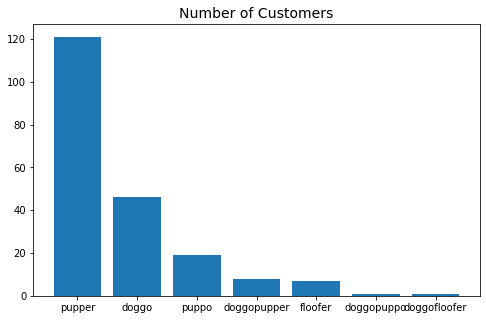

In [90]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=df_master['stage'].value_counts().index,
        height=df_master.stage.value_counts().values)

- Pupper is the most most popular stage